Generar una grafica con la trayectoria de un huracan.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas import DataFrame

In [2]:
escala = pd.read_excel("escala_saffir_simpson.xlsx","Hoja1")
escala

,categoria,descripcion,color,nudos_min,nudos_max
0,TD,Depresion Tropical,deepskyblue,0,33
1,TS,Tormenta Tropical,lime,34,63
2,C1,Categoria 1,yellow,64,82
3,C2,Categoria 2,gold,83,95
4,C3,Categoria 3,orange,96,113
5,C4,Categoria 4,red,114,135
6,C5,Categoria 5,magenta,136,500


In [3]:
huracan = pd.read_csv('huracan_maria.csv',sep=';')
huracan

,FECHA,HORA,LATITUD,LONGITUD,NUDOS,PRESION
0,sep-16,15:00 GMT,12.2,-50.5,35,1008
1,sep-16,18:00 GMT,11.9,-51.6,35,1006
2,sep-16,21:00 GMT,12.3,-52.6,50,1002
3,sep-17,00:00 GMT,12.4,-53.0,50,1002
4,sep-17,03:00 GMT,12.5,-53.7,50,1002
...,...,...,...,...,...,...
115,sep-29,21:00 GMT,37.8,-57.4,60,988
116,sep-30,03:00 GMT,38.6,-53.9,60,988
117,sep-30,09:00 GMT,39.6,-50.5,60,988
118,sep-30,15:00 GMT,40.7,-47.2,60,989


In [54]:
def getCategoria(nudos, escala):
    """
    Devuelve la categoria segun la velocidad en nudos: 
    """
    linea = escala[(nudos >= escala['nudos_min']) & (nudos <= escala['nudos_max'])]
    return linea.iloc[0]['categoria']       

In [55]:
# Prueba de la funcion:
cat = getCategoria(100, escala)
cat

'C3'

In [56]:
def getColor(cat, escala):
    """
    Devuelve el color a partir de una categoria:
    """
    linea = escala[cat == escala['categoria']]
    return linea.iloc[0]['color']

In [58]:
color = getColor("C1",escala)
color

'yellow'

Recuperar datos del huracan: longitud, latitud, categoria

In [42]:
datos = huracan[['LATITUD','LONGITUD','NUDOS']]
datos

,LATITUD,LONGITUD,NUDOS
0,12.2,-50.5,35
1,11.9,-51.6,35
2,12.3,-52.6,50
3,12.4,-53.0,50
4,12.5,-53.7,50
...,...,...,...
115,37.8,-57.4,60
116,38.6,-53.9,60
117,39.6,-50.5,60
118,40.7,-47.2,60


Necesitamos una grafica por cada categoria, utilizaremos un gráfico scatter (puntos que se colorean segun la escala y la velocidad del viento, podemos añadir nuevas columnas al DataFrame. Podemos crear un diccionario con las categorias como clave y como valor una lista con tuplas que indiquen las coordenadas.

In [53]:
categorias = dict()

for i in range(len(datos)):
    nudos = datos.iloc[i]['NUDOS']
    cat = getCategoria(nudos, escala)
    lat,lon = datos.iloc[i]['LATITUD'],datos.iloc[i]['LONGITUD']
    
    if cat in categorias:
        categorias[cat].append((lat,lon))
    else:
        categorias[cat]=[(lat,lon)]
        
categorias        

{'TS': [(12.2, -50.5),
  (11.9, -51.6),
  (12.3, -52.6),
  (12.4, -53.0),
  (12.5, -53.7),
  (12.7, -54.4),
  (37.2, -63.3),
  (37.5, -60.1),
  (37.8, -57.4),
  (38.6, -53.9),
  (39.6, -50.5),
  (40.7, -47.2),
  (42.0, -43.9)],
 'C1': [(13.0, -54.9),
  (13.3, -55.6),
  (13.5, -56.2),
  (13.6, -56.9),
  (13.8, -57.5),
  (14.0, -57.9),
  (30.6, -73.0),
  (30.8, -73.0),
  (31.2, -72.9),
  (31.4, -73.0),
  (31.7, -73.1),
  (32.0, -73.0),
  (32.3, -73.1),
  (32.6, -73.2),
  (32.9, -73.1),
  (33.3, -73.1),
  (33.6, -73.1),
  (33.8, -73.1),
  (34.1, -73.0),
  (34.6, -72.9),
  (34.9, -72.9),
  (34.8, -73.0),
  (35.1, -72.9),
  (35.4, -72.8),
  (35.6, -72.6),
  (35.9, -72.4),
  (36.2, -72.1),
  (36.5, -71.8),
  (36.8, -71.5),
  (36.8, -71.0),
  (36.8, -69.3),
  (36.8, -67.8),
  (37.1, -65.5)],
 'C2': [(14.2, -58.4),
  (14.4, -59.0),
  (14.6, -59.5),
  (30.0, -73.0),
  (30.2, -73.0)],
 'C3': [(14.6, -59.7),
  (18.8, -67.3),
  (18.9, -67.5),
  (19.2, -67.9),
  (27.9, -72.7),
  (28.7, -72.9),
  (2

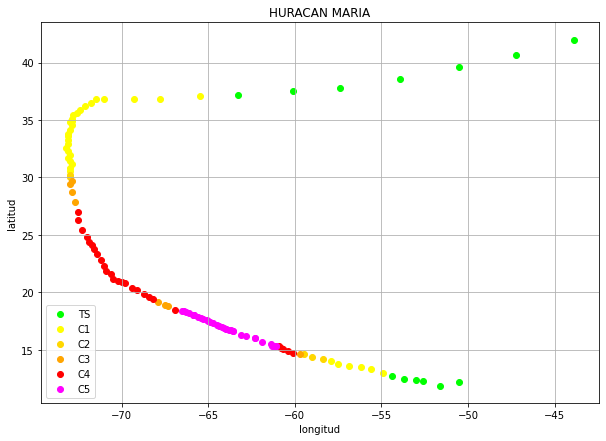

In [68]:
plt.rcParams['figure.figsize'] = [10, 7]
for cat, L in categorias.items():
    eje_x = [t[1] for t in L]
    eje_y = [t[0] for t in L]
    
    color = getColor(cat, escala)
    
    plt.scatter(eje_x, eje_y, marker='o',label=cat,color=color)
    
plt.ylabel('latitud')
plt.xlabel('longitud')
plt.grid(True)
plt.title('HURACAN MARIA')
plt.legend();